<h1><center>
    ECE 438 - Laboratory 2<br/>
    Discrete-Time Systems<br/>
    <small>Last updated on January 17, 2022</small>
</center></h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [ ]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2 style="color:salmon;"><left>1. Introduction</left></h2>

A discrete-time system is anything that takes a discrete-time signal as input and generates a discrete-time signal as output. The concept of a system is very general. It may be used to model the response of an audio equalizer or the performance of the US economy.

In electrical engineering, *__continuous-time__* signals are usually processed by electrical circuits described by differential equations. For example, any circuit of resistors, capacitors, and inductors can be analyzed using mesh analysis to yield a system of differential equations. The voltages and currents in the circuit may then be computed by solving the equations.

The processing of *__discrete-time__* signals is performed by discrete-time systems. Similar to the continuous-time case, we may represent a discrete-time system either by a set of difference equations or by a block diagram of its implementation. For example, consider the following difference equation.

\begin{equation}
    y[n]=y[n-1]-2x[n]+3x[n-1]\tag{1}
\end{equation}

This equation represents a discrete-time *__system__*. It operates on the input signal $x[n]$ to produce the output signal $y[n]$. This system may also be defined by a system diagram as in Figure 1.

<img src="https://github.com/cdavin2/dsp_lab02/blob/main/imgs/lab02_figure1.png?raw=1" style="width:60%;">

Mathematically, we use the notation $y=S[x]$ to denote a discrete-time system $S$ with input signal $x[n]$ and output signal $y[n]$. Notice that the input and output to the system are the complete signals for __all__ time $n$. This is important since the output at a particular time can be a function of past, present, and future values of $x[n]$.

It is usually quite straightforward to write a computer program to implement a discrete-time system from its difference equation. In fact, programmable computers are one of the easiest and most cost-effective ways of implementing discrete-time systems.

While Equation (1) is an example of a linear time-invariant system, other discrete-time systems may be nonlinear and/or time-varying. In order to understand discrete-time systems, it is important to first understand their classification into categories of linear/nonlinear, time-invariant/time-varying, causal/noncausal, memoryless/with-memory, and stable/unstable. Then it is possible to study the properties of restricted classes of systems, such as discrete-time systems, which are linear, time-invariant, and stable.

<h2 style="color:salmon;"><left>2. Example of Discrete-time Systems</left></h2>

Discrete-time digital systems are often used in place of analog processing systems. Common examples are the replacement of photographs with digital images and conventional NTSC TV with direct broadcast digital TV. These digital systems can provide higher quality and/or lower cost through the use of standardized, high-volume digital processors.

The following two continuous-time systems are commonly used in electrical engineering:

\begin{align}
    \text{differentiator}:&\quad y(t)=\frac{d}{dt}x(t)\tag{2}\\
    \text{integrator}:&\quad y(t)=\int_{-\infty}^tx(\tau)d\tau\tag{3}
\end{align}

To illustrate how a discrete-time system can be derived from the corresponding continuous-time system, we will show how the above two continuous-time systems can be formulated into corresponding discrete-time systems.

<h3 style="color:salmon;"><left>2.1 Formulation of a discrete-time system that approximates the continuous-time differentiator</left></h3>

Since $y(t)=\frac{d}{dt}x(t)$, by the definition of differentiation, $y(t)=\lim_{\Delta t\rightarrow0}\frac{x(t+\Delta t)-x(t)}{\Delta t}$, so sampling $y(t)$ at time $nT$ with sufficiently small $T$ gives

\begin{equation}
    y(nT)\approx \frac{x(nT)-x\left(\left(n-1\right)T\right)}{T}\tag{4}
\end{equation}

Clearly, this approximation is more accurate when $T$ is sufficiently small. If we define $y[n]\triangleq y(nT)$ and $x[n]\triangleq x(nT)$, then we arrive at a discrete-time system that approximates the continuous-time differentiator: $y[n]=\frac{\left(x[n]-x[n-1]\right)}{T}$.

<h3 style="color:salmon;"><left>2.2 Formulation of a discrete-time system that approximates the continuous-time integrator</left></h3>

Since $y(t)=\int_{-\infty}^tx(\tau)d\tau$, so sampling $y(t)$ at time $nT$ gives
\begin{aligned}
    y(nT)&=\int_{-\infty}^{nT}x(\tau)d\tau\\
    &=\int_{-\infty}^{(n-1)T}x(\tau)d\tau+\int_{(n-1)T}^{nT}x(\tau)d\tau\\
    &\approx y((n-1)T)+x(nT)\cdot T
\end{aligned}

Clearly, this approximation is more accurate when $T$ is sufficiently small. If we define $y[n]\triangleq y(nT)$ and $x[n]\triangleq x(nT)$, then we arrive at a discrete-time system that approximates the continuous-time integrator: $y[n]=y[n-1]+x[n]\cdot T$.

<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Draw the block diagram of the discrete-time differentiator as in Figure 1.**

insert your diagram here

**2. Apply the discrete-time differentiator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<ipython-input-76-a475a61069d9>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, yn)


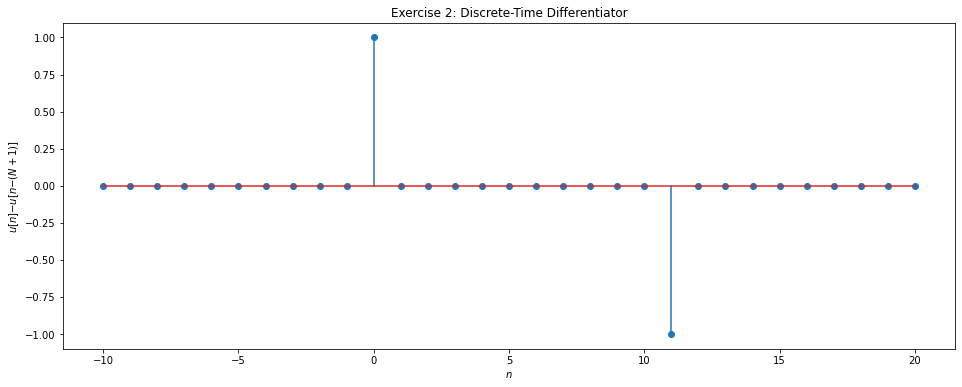

In [ ]:
# write your code here
n = np.linspace(-10, 20, 31)
xn = (0 <= n).astype(float) - (11 <= n).astype(float)
xn_1 = (1 <= n).astype(float) - (12 <= n).astype(float)
yn = (xn - xn_1) / 1

plt.title(r"Exercise 2: Discrete-Time Differentiator")
plt.ylabel(r"$u[n]−u[n−(N+1)]$")
plt.xlabel(r"$n$")
plt.stem(n, yn)
plt.show()



**3. Draw the block diagram of the discrete-time integrator as in Figure 1.**

write your answer here

**4. Apply the discrete-time integrator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<ipython-input-77-6debaff453c0>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, yn)


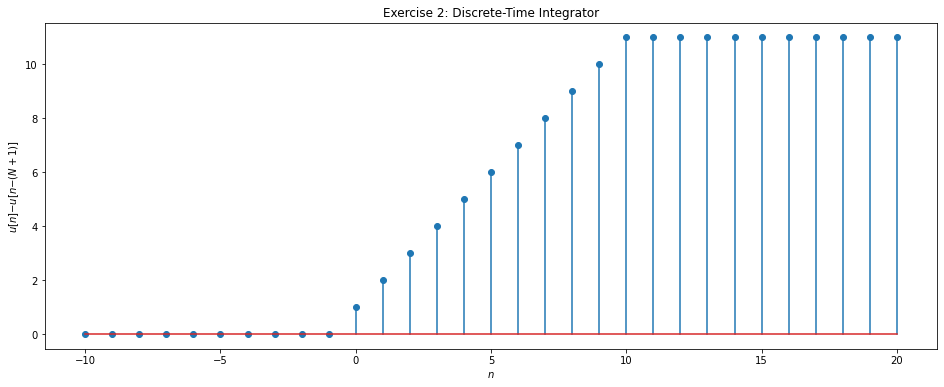

In [ ]:
# write your code here
n = np.linspace(-10, 20, 31)
xn = (0 <= n).astype(float) - (11 <= n).astype(float)

yn = np.zeros(31)
yn[0] = xn[0] # set initial condition

for i in range(1, len(xn)):
  yn[i] = yn[i - 1] + xn[i] * 1

plt.title(r"Exercise 2: Discrete-Time Integrator")
plt.ylabel(r"$u[n]−u[n−(N+1)]$")
plt.xlabel(r"$n$")
plt.stem(n, yn)
plt.show()


**5. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.1$.**

<ipython-input-78-25f4c6c4d068>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, yn)


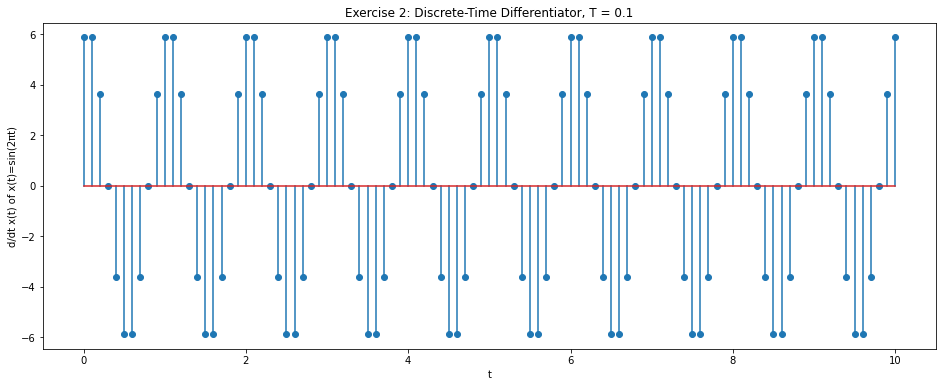

In [ ]:
# write your code here
t = np.arange(0, 10+.1, .1) # aka nT
xt = np.sin(2*np.pi*t)
xt_1 = np.sin(2*np.pi*(t-.1))
yn = (xt - xt_1)/(.1)

plt.title(r"Exercise 2: Discrete-Time Differentiator, T = 0.1")
plt.ylabel(r"d/dt x(t) of x(t)=sin(2πt)")
plt.xlabel(r"t")
plt.stem(t, yn)
plt.show()


**6. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.001$.**

<ipython-input-79-921c3c27e8c6>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, yn)


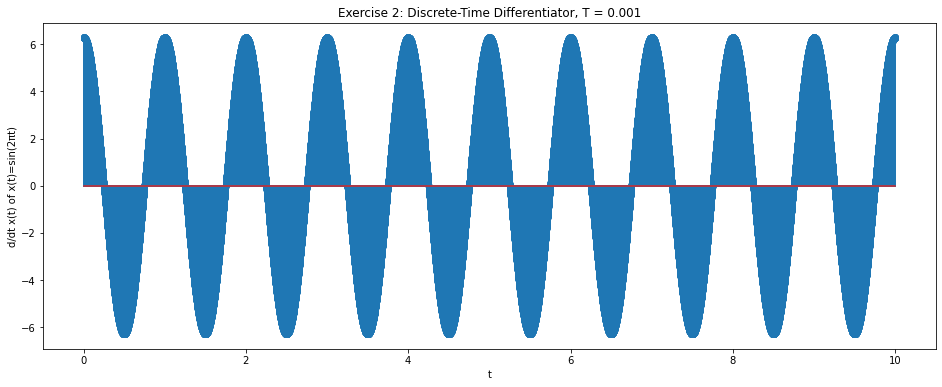

In [ ]:
# write your code here
t = np.arange(0, 10+.001, .001)
xt = np.sin(2*np.pi*t)
xt_1 = np.sin(2*np.pi*(t-.001))
yn = (xt - xt_1)/(.001)

plt.title(r"Exercise 2: Discrete-Time Differentiator, T = 0.001")
plt.ylabel(r"d/dt x(t) of x(t)=sin(2πt)")
plt.xlabel(r"t")
plt.stem(t, yn)
plt.show()


**7. Compare the results in Q5 and Q6.**

write your answer here

<h2 style="color:salmon;"><left>3. Difference Equations</left></h2>

In this section, we will study the effect of two discrete-time filters. The first filter, $y=S_1[x]$, obeys the difference equation

\begin{equation}
    y[n]=x[n]-x[n-1]
\end{equation}

and the second filter, $y=S_2[x]$, obeys the difference equation

\begin{equation}
    y[n]=\frac{1}{2}y[n-1]+x[n]
\end{equation}

<h3 style="color:red;"><left>Exercise 3</left></h3>

**1. For each of these five systems, do the following:**

* $S_1$
* $S_2$
* $S_1(S_2)$ (i.e., the series connection with $S_1$ following $S_2$)
* $S_2(S_1)$ (i.e., the series connection with $S_2$ following $S_1$)
* $S_1+S_2$

**i. Draw the system diagram (use only delays, multiplications, and additions as in Figure 1)**

insert your diagram here

**ii. Write code to implement each of these two filters ($S_1, S_2$) in the following functions using the following syntax**
```python
def S1(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

and 
```python
def S2(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [ ]:
# write your code here
def S1(x):
  y = np.zeros(len(x)) # len(x) is 21
  y[0] = x[0] # initial condition 

  for i in range(1, len(x)): # 1...20
    y[i] = x[i] - x[i - 1]

  return y

def S2(x):
  y = np.zeros(len(x))
  y[0] = x[0]

  for i in range(1, len(x)): 
    y[i] = (1/2) * y[i - 1] + x[i]

  return y


**iii. Write code to calculate the impulse response of each of the five systems, and plot the impulse response of each of these five systems:**

<ipython-input-83-01d32a76dc5c>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S1(delta))


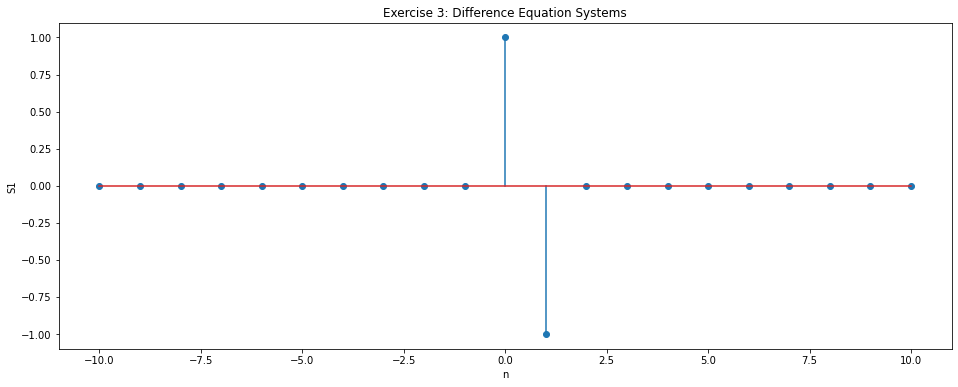

<ipython-input-83-01d32a76dc5c>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S2(delta))


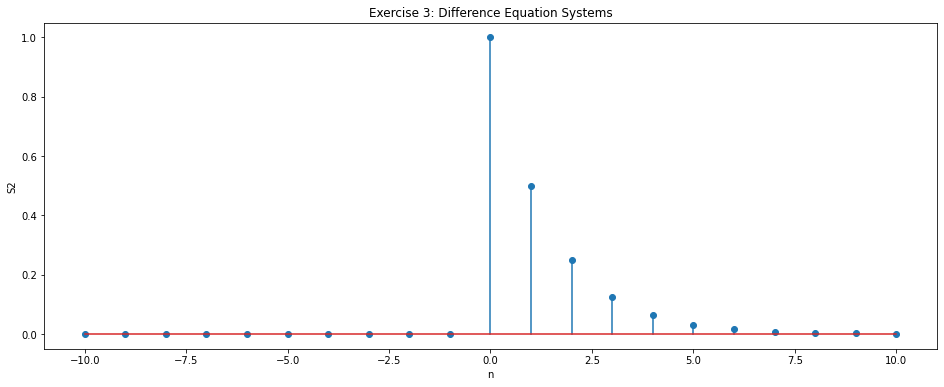

<ipython-input-83-01d32a76dc5c>:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S1(S2(delta)))


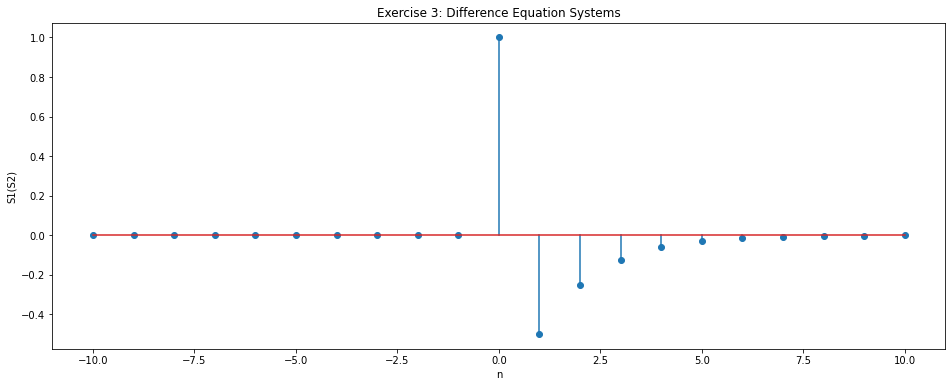

<ipython-input-83-01d32a76dc5c>:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S2(S1(delta)))


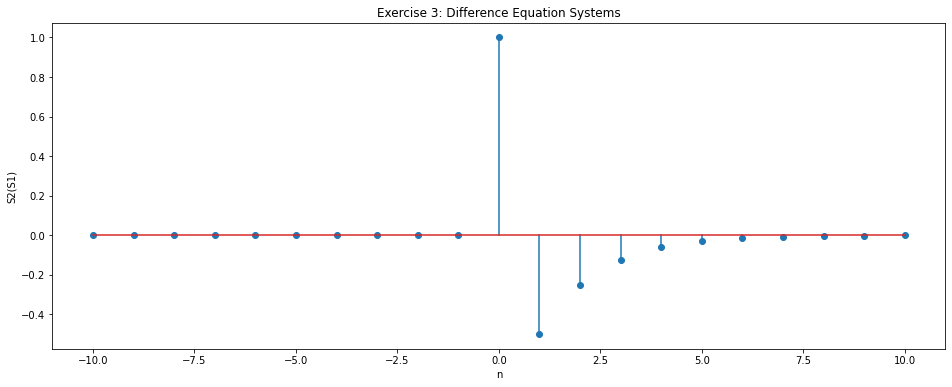

<ipython-input-83-01d32a76dc5c>:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S1(delta) + S2(delta))


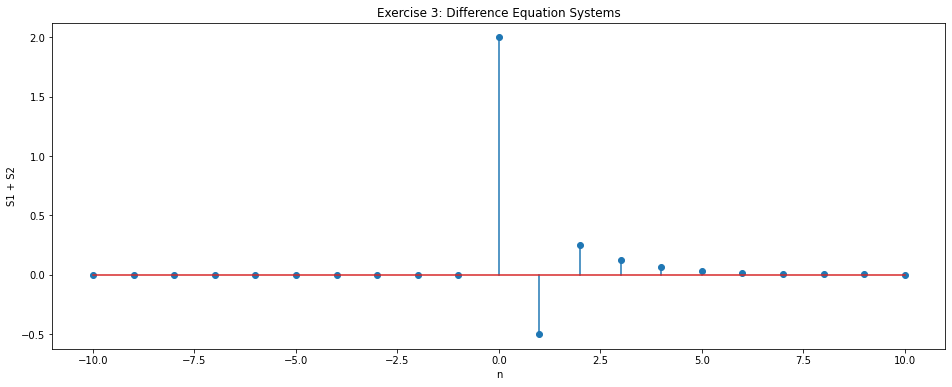

In [ ]:
# write your code here
n = np.linspace(-10, 10, 21)
delta = (n == 0).astype(float)


plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S1")
plt.xlabel(r"n")
plt.stem(n, S1(delta))
plt.show()

plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S2")
plt.xlabel(r"n")
plt.stem(n, S2(delta))
plt.show()

plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S1(S2)")
plt.xlabel(r"n")
plt.stem(n, S1(S2(delta)))
plt.show()

plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S2(S1)")
plt.xlabel(r"n")
plt.stem(n, S2(S1(delta)))
plt.show()

plt.title(r"Exercise 3: Difference Equation Systems")
plt.ylabel(r"S1 + S2")
plt.xlabel(r"n")
plt.stem(n, S1(delta) + S2(delta))
plt.show()



**2. Use the command ```audio, fs = sf.read("music.au")``` to load the file ```music.au``` into Python. The first variable ```audio``` is the signal, and the second variable ```fs``` is the sampling rate.**

In [ ]:
# write your code here
audio, fs = sf.read("music.au")


**3. Play the audio file using the command `ipd.Audio(audio, rate=fs)`.**

In [ ]:
# write your code here
ipd.Audio(audio, rate=fs)


**4. Next, filter the audio signal with each of the two systems $S_1$ and $S_2$ and listen to each of their outputs.**

In [ ]:
# write your code here
audio_s1 = S1(audio)
ipd.Audio(audio_s1, rate=fs)

In [ ]:
audio_s2 = S2(audio)
ipd.Audio(audio_s2, rate=fs)

**5. How do the filters change the sound of the audio signals? Explain your observations.**

write your answer here

<h2 style="color:salmon;"><left>4. Inverse Systems</left></h2>

<h3 style="color:red;"><left>Exercise 4</left></h3>

**1. Consider the system $y=S_2[x]$ from Section 3. Find a difference equation for a new system $y=S_3[x]$ such that $\delta=S_3[S_2[\delta]]$ where $\delta$ denotes the discrete-time impulse function $\delta(n)$. Since both systems $S_2$ and $S_3$ are LTI, the time-invariance and superposition properties can be used to obtain $x=S_3[S_2[x]]$ for *any* discrete-time signal $x$. We say that the systems $S_3$ and $S_2$ are inverse filters because they cancel out the effects of each other.**

**Hint:** The system $y=S_3[x]$ can be described by the difference equation

\begin{equation}
    y[n]=ax[n]+bx[n-1]
\end{equation}

where $a$ and $b$ are constants.

insert your answer here

**2. Complete the Python function using the following syntax.**
```python
def S3(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [97]:
# write your code here
def S3(x):
  y = np.zeros(len(x)) # len(x) is 21
  y[0] = x[0] # initial condition 

  for i in range(1, len(x)): # 1...20
    y[i] = x[i] - (0.5 * x[i - 1])

  return y


**3. Write code to plot the impulse response of both $S_3$ and $S_3[S_2[\delta]]$ below.**

<ipython-input-98-8be85e2857cb>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S3(delta))


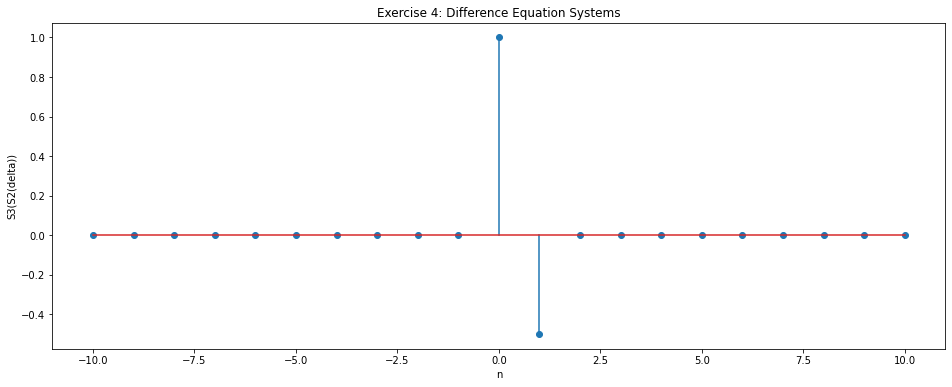

<ipython-input-98-8be85e2857cb>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, S3(S2(delta)))


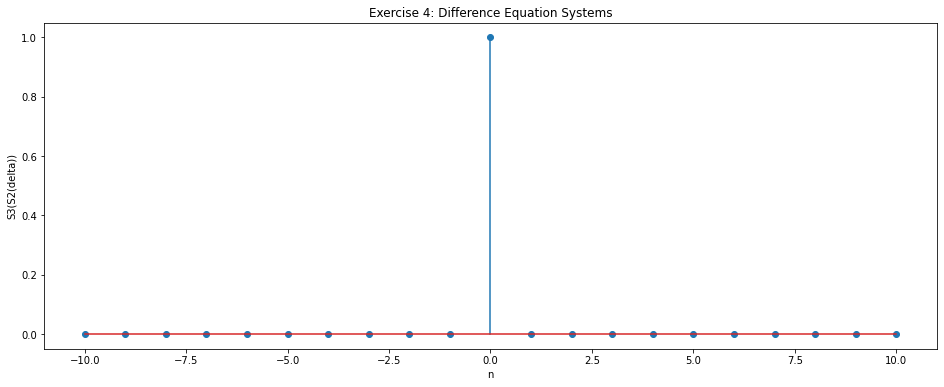

In [98]:
# write your code here
n = np.linspace(-10, 10, 21)
delta = (n == 0).astype(float)

plt.title(r"Exercise 4: Difference Equation Systems")
plt.ylabel(r"S3(S2(delta))")
plt.xlabel(r"n")
plt.stem(n, S3(delta))
plt.show()

plt.title(r"Exercise 4: Difference Equation Systems")
plt.ylabel(r"S3(S2(delta))")
plt.xlabel(r"n")
plt.stem(n, S3(S2(delta)))
plt.show()

<h2 style="color:salmon;"><left>5. System Tests</left></h2>

<h3 style="color:red;"><left>Exercise 5</left></h3>

Often it is necessary to determine if a system is linear and/or time-invariant. If the inner workings of a system are not known, this task is impossible because the linearity and time-invariance properties must hold true for all possible input signals. However, it is possible to show that a system is non-linear or time-varying because only a single instance must be found where the properties are violated.

The code in the cell below is the synatx for the three imported black boxes, ```bbox1```, ```bbox2``` and ```bbox3```. All of them have the same syntax
```python
def bboxN(x):
    return y
```
where ```x``` and ```y``` are the input and the output signals, and ```N=1,2,3```. **Exactly one of these systems is non-linear, and exactly one of them is time-varying.** Your task is to find the non-linear system and the time-varying system.

**Hints:** 
* You should try a variety of input signals until you find a counter-example.
* When testing for time-invariance, you need to look at the responses to a signal and to its delayed version. Since all your signals in Python have a finite duration, you should be very careful about shifting signals. In particular, if you want to shift a signal $x$ by $M$ samples to the left, $x$ should start with at least $M$ zeros. If you want to shift $x$ by $M$ samples to the right, $x$ should end with at least $M$ zeros.
* When testing for linearity, you may find that simple inputs such as the unit impulse do not accomplish the task. In this case, you should try something more complicated like a sinusoid or a random signal generated with the ```x = np.random.rand(N)``` command, where ```N``` here is the length of the signal.

**1. Import the three bbboxes from the file ```bboxes.py```.**

In [ ]:
# write your code here
from bboxes import bbox1, bbox2, bbox3

**2. Write code to plot input/output signal pairs that support your conclusions. Create multiple code cells if necessary.**

<ipython-input-115-2b3b286e87d2>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


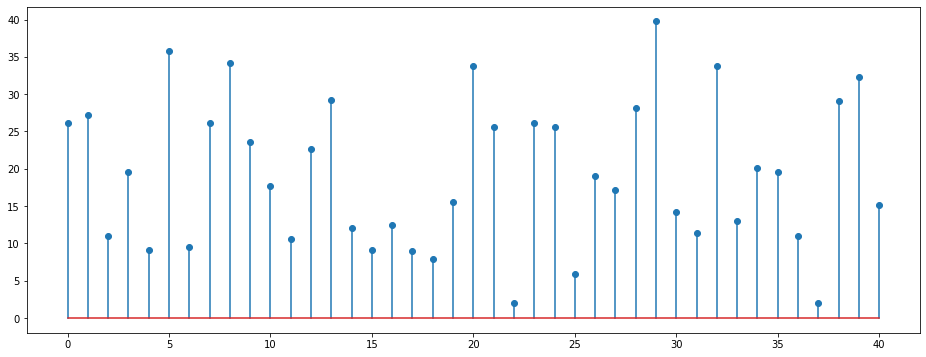

<ipython-input-115-2b3b286e87d2>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


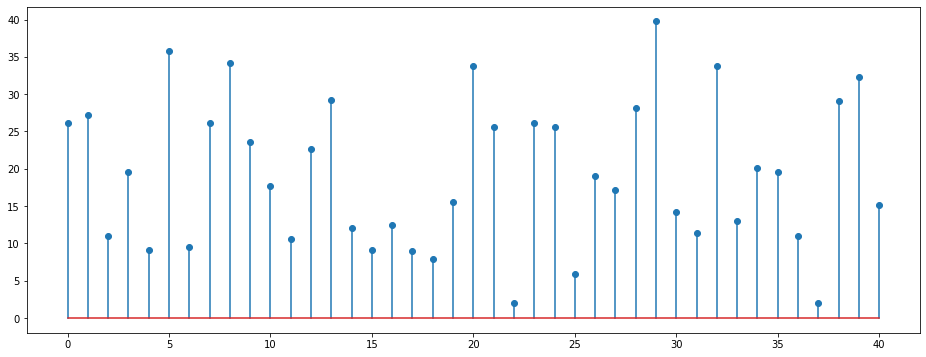

<ipython-input-115-2b3b286e87d2>:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


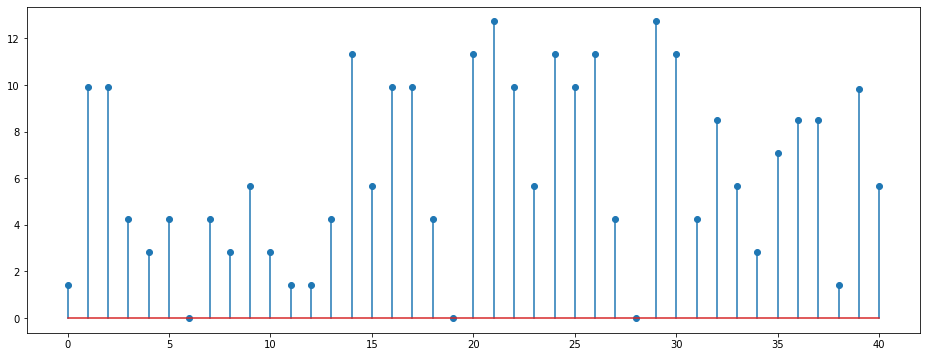

<ipython-input-115-2b3b286e87d2>:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


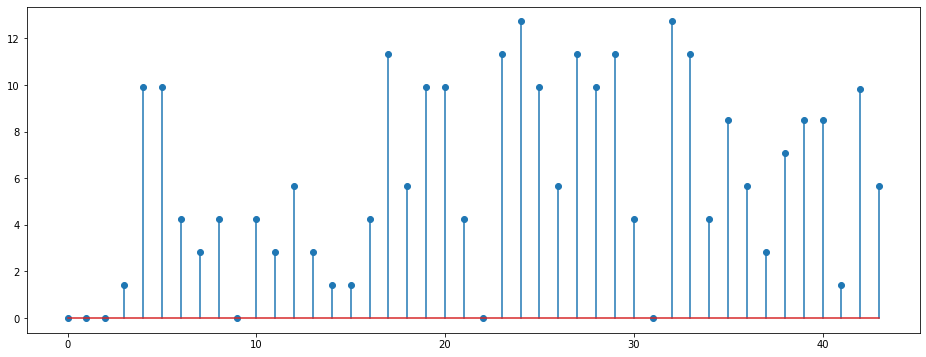

In [115]:
#linearity for bbox 1
a = .7
b = 2.5
f1 = np.random.randint(10, size = 41)
f2 = np.random.randint(10, size = 41)

s1 = a * bbox1(f1) + b * bbox1(f2)
s2 = bbox1(a * f1 + b * f2)

plt.stem(s1)
plt.show()

plt.stem(s2)
plt.show()

#time variance for bbox 1

f1 = np.random.randint(10, size = 41)
f2 = np.zeros(41+3)

for i in range(3, 41+3):
  f2[i] = f1[i-3]

s1 = bbox1(f1)
s2 = bbox1(f2)

plt.stem(s1)
plt.show()

plt.stem(s2)
plt.show()


<ipython-input-116-619a8b962129>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


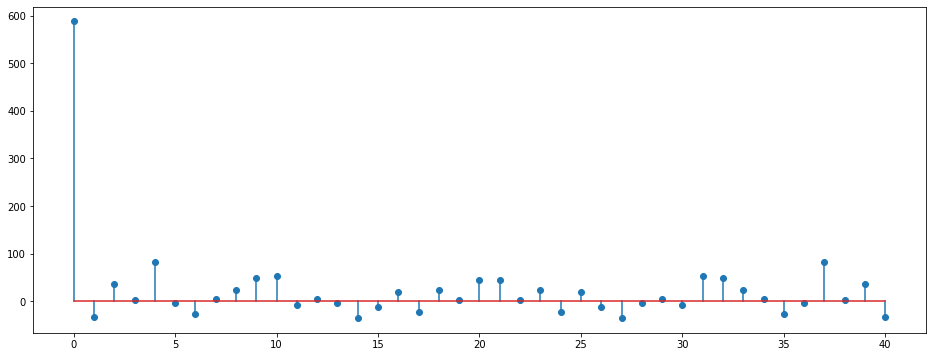

<ipython-input-116-619a8b962129>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


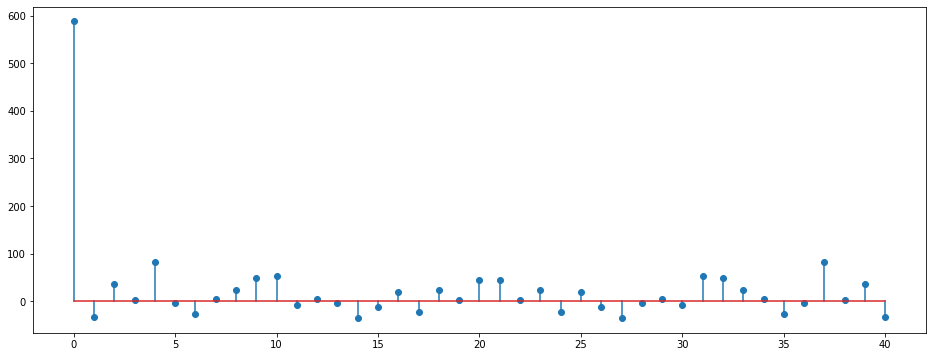

<ipython-input-116-619a8b962129>:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


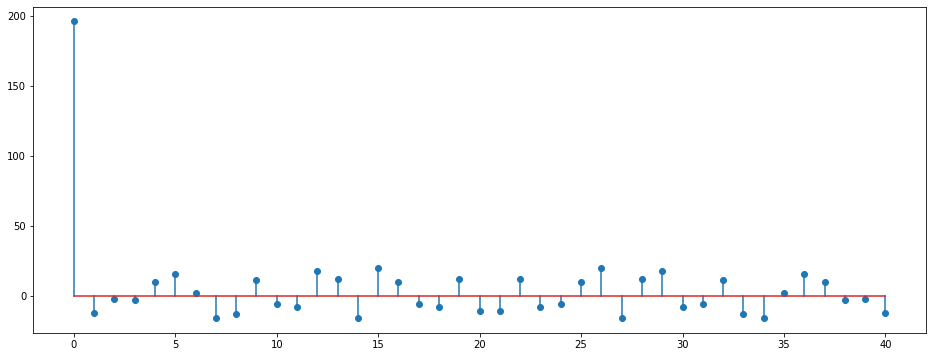

<ipython-input-116-619a8b962129>:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


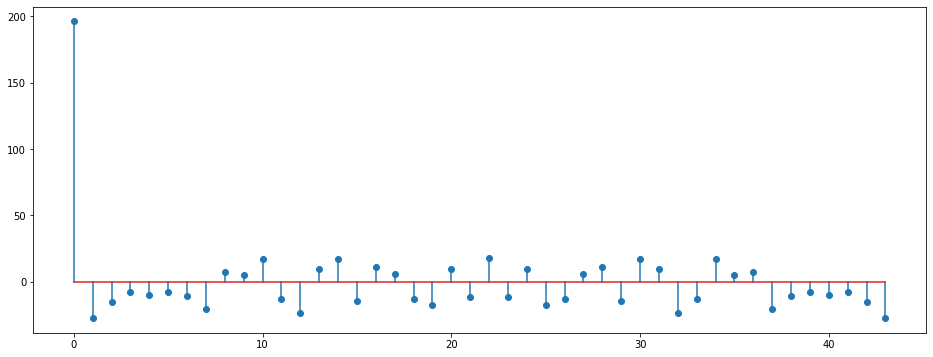

In [116]:
#linearity for bbox 2
a = .7
b = 2.5
f1 = np.random.randint(10, size = 41)
f2 = np.random.randint(10, size = 41)

s1 = a * bbox2(f1) + b * bbox2(f2)
s2 = bbox2(a * f1 + b * f2)

plt.stem(s1)
plt.show()

plt.stem(s2)
plt.show()

#time variance for bbox 2 (time varying)

f1 = np.random.randint(10, size = 41)
f2 = np.zeros(41+3)

for i in range(3, 41+3):
  f2[i] = f1[i-3]

s1 = bbox2(f1)
s2 = bbox2(f2)

plt.stem(s1)
plt.show()

plt.stem(s2)
plt.show()

  


<ipython-input-117-9eba68bf66a9>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


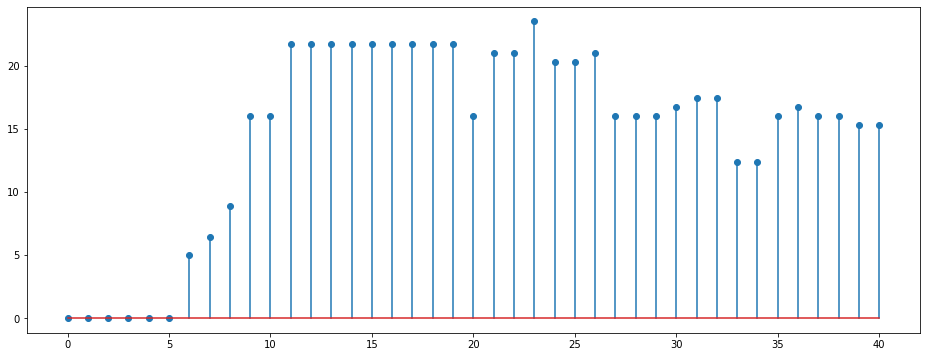

<ipython-input-117-9eba68bf66a9>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


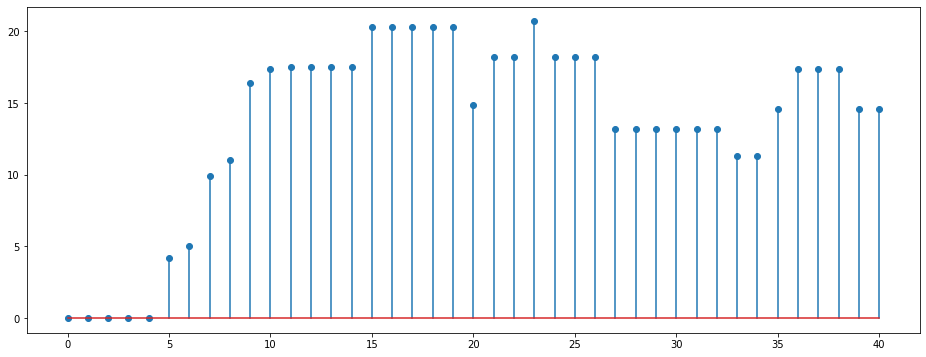

<ipython-input-117-9eba68bf66a9>:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s1)


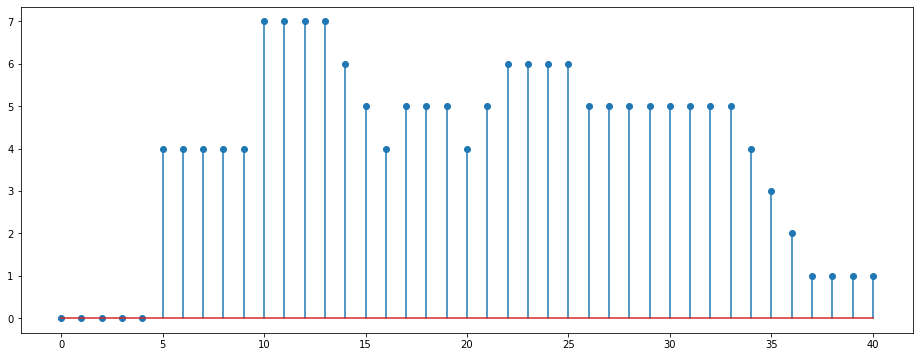

<ipython-input-117-9eba68bf66a9>:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(s2)


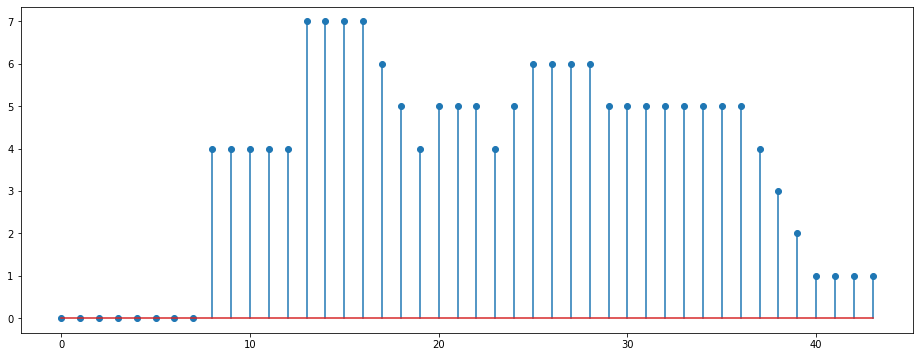

In [117]:
#linearity for bbox 3
a = .7
b = 2.5
f1 = np.random.randint(10, size = 41)
f2 = np.random.randint(10, size = 41)

s1 = a * bbox3(f1) + b * bbox3(f2)
s2 = bbox3(a * f1 + b * f2)

plt.stem(s1)
plt.show()

plt.stem(s2)
plt.show()

#time variance for bbox 3

f1 = np.random.randint(10, size = 41)
f2 = np.zeros(41+3)

for i in range(3, 41+3):
  f2[i] = f1[i-3]

s1 = bbox3(f1)
s2 = bbox3(f2)

plt.stem(s1)
plt.show()

plt.stem(s2)
plt.show()

**2. State which system is non-linear and which system is time-varying.**


BBOX2 is time varying/BBOX3 is not linear

**3. Explain how the plots support your conclusion.**

BBOX3 is not linear

<h2 style="color:salmon;"><left>6. Stock Market Example</left></h2>

<h3 style="color:salmon;"><left>6.1 Moving Averages</left></h3>

One reason that digital signal processing (DSP) techniques are so powerful is that they can be used for very different kinds of signals. While most continuous-time systems only process voltage and current signals, a computer can process discrete-time signals, which are essentially just sequences of numbers. Therefore DSP may be used in a very wide range of applications. Let's look at an example.

A stockbroker wants to see whether the average value of a certain stock is increasing or decreasing. To do this, the daily fluctuations of the stock values must be eliminated. A popular business magazine recommends three possible methods for computing this average.

\begin{align}
    \text{averagevalue}(\text{today})&=\frac{1}{3}\left(\text{value}\left(\text{today}\right)+\text{value}\left(\text{yesterday}\right)+\text{value}\left(\text{2 days ago}\right)\right)\tag{5}\\
    \text{averagevalue}(\text{today})&=0.6\times\text{averagevalue}(\text{yesterday})+0.4\times\left(\text{value}\left(\text{today}\right)\right)\tag{6}\\
    \text{averagevalue}(\text{today})&=\text{averagevalue}(\text{yesterday})+\frac{1}{3}\left(\text{value}\left(\text{today}\right)-\text{value}\left(\text{3 days ago}\right)\right)\tag{7}
\end{align}

<h3 style="color:red;"><left>Exercise 6.1</left></h3>

**For each of these three methods:**

**1. write a difference equation**

(5) y[n] = 1/3 * (x[n]+ x[n-1] + x[n-2])

(6) y[n] = 0.6 * y[n-1] + .4 * x[n]

(7) y[n] = y[n-1] + 1/3 * (x[n] - x[n-3])

**2. Draw a system diagram**

insert your diagram here

**3. Calculate the impulse response**

(5) y[n] = 1/3 * (δ[n]+ δ[n-1] + δ[n-2])

(6) y[n] = 0.6 * y[n-1] + .4 * δ[n]

(7) y[n] = y[n-1] + 1/3 * (δ[n] - δ[n-3])

**4. Explain why methods (5) and (7) are known as moving average.**

write your answer here

<h3 style="color:red;"><left>Exercise 6.2</left></h3>

Load the file ```stockrates.npy``` into Python. This file contains a vector of daily stock market exchange rates for a publicly-traded stock.

Apply filters (6) and (7) to smooth the stock values. When you apply filter (6), you will need to initialize the value of *averagevalue(yesterday)*. Use an initial value of $0$. Similarly, in filter (7), set the initial values of the *value* vector to $0$ (for the days prior to the start of data collection).

**Note: You will need the following code to load data that is stored in a `.npy` file.**

In [ ]:
rate = np.load("stockrates.npy")

**1. Plot the original stock values.**

In [ ]:
# write your code here


**2. Plot the result of filtering with (6).**

In [ ]:
# write your code here


**3. Plot the result of filtering with (7).**

In [ ]:
# write your code here


**4. Discuss the advantages and disadvantages of the two filters (6) and (7). Can you suggest a better method for initializing the filter outputs?**.

write your answer here